In [1]:
import matplotlib.pyplot as plt
import numpy as np

from DLA_SOR import DLA_SOR, calc_optimal_omega
from monte_carlo_DLA import MonteCarloDLA
from simulation_manager import SimulationManager

In [2]:
# Run cell to increase font sizes. Usefull when saving plots
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8,6)

## Excercise A

Running DLA_SOR with eta=2.0

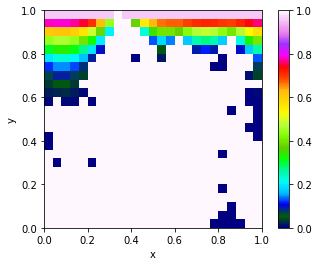

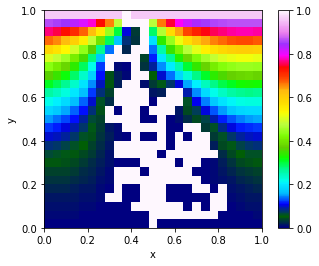

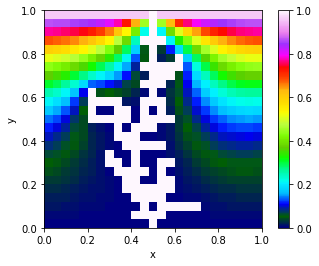

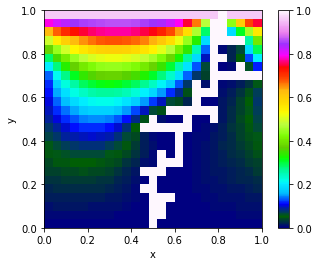

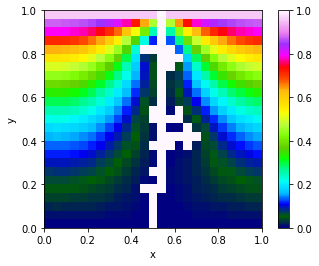

In [2]:
# Plot end result of different structures with different etas

N = 25
etas = np.arange(0, 2.5, 0.5)

for eta in etas:
    print(f"\rRunning DLA_SOR with eta={eta}", end="")

    sim = DLA_SOR(eta=eta, N=N)
    sim.run()
    sim.create_plot()

plt.show()

80.0% DLA_SOR: N=25, eta=2.0, omega=1.9, stopping_e=0.001

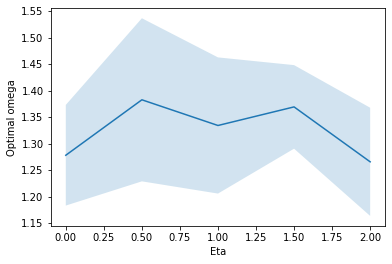

In [2]:
# Optimising omega for different eta values

N = 25
n_instances = 5

omega_means, omega_stds = [], []
etas = np.arange(0, 2.5, 0.5)

for eta in etas:

    sim_manager = SimulationManager(DLA_SOR, n_instances, eta=eta, N=N, stopping_e=10**-3)

    # Since calc_optimal_omega runs the simulations, the kwargs run=False is passed
    omega_mean, omega_std = sim_manager.calc_attribute(lambda sim: calc_optimal_omega(sim)[0], run=False)

    omega_means.append(omega_mean)
    omega_stds.append(omega_std)

omega_means = np.array(omega_means)
omega_stds = np.array(omega_stds)

plt.plot(etas, omega_means)
plt.fill_between(etas, omega_means - omega_stds, omega_means + omega_stds, alpha=0.2)
plt.xlabel("Eta")
plt.ylabel("Optimal omega")
plt.show()

80.0% DLA_SOR: N=25, eta=2.0, omega=1.9, stopping_e=0.001

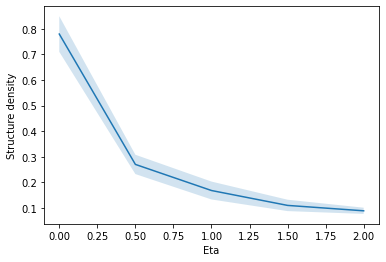

In [4]:
# Plot impact of eta on density
N = 25
n_instances = 5

density_means, density_stds = [], []
etas = np.arange(0, 2.5, 0.5)

for eta in etas:

    sim_manager = SimulationManager(DLA_SOR, n_instances, eta=eta, N=N, stopping_e=10**-3)

    density_mean, density_std = sim_manager.calc_attribute(lambda sim: sim.calc_density())

    density_means.append(density_mean)
    density_stds.append(density_std)

density_means = np.array(density_means)
density_stds = np.array(density_stds)

plt.plot(etas, density_means)
plt.fill_between(etas, density_means - density_stds, density_means + density_stds, alpha=0.2)
plt.xlabel("Eta")
plt.ylabel("Structure density")
plt.show()  

## Excercise B

In [5]:
# Compare diffusion DLA vs monte carlo DLA

n_instances = 10
N = 100

diffusion_sim_manager = SimulationManager(DLA_SOR, n_instances, eta=1, N=N)
diffusion_density_mean, diffusion_density_std = diffusion_sim_manager.calc_attribute(lambda sim: sim.calc_density())

monte_carlo_sim_manager = SimulationManager(MonteCarloDLA, n_instances, N=N)
monte_carlo_density_mean, monte_carlo_density_std = monte_carlo_sim_manager.calc_attribute(lambda sim: sim.calc_density())

print(f"Diffusion density: {diffusion_density_mean} +- {diffusion_density_std}")
print(f"Monte carlo density: {monte_carlo_density_mean} +- {monte_carlo_density_std}")

Diffusion density: 0.09998 +- 0.013188313008114422
Monte carlo density: 0.17601 +- 0.008233037106681832


## Excercise c


Running sticking probability: 0.90

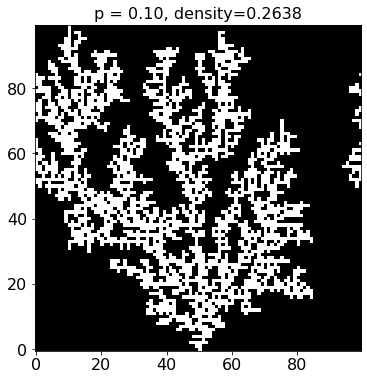

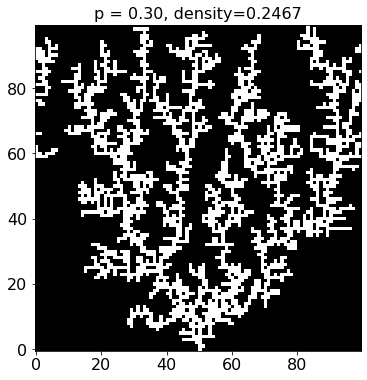

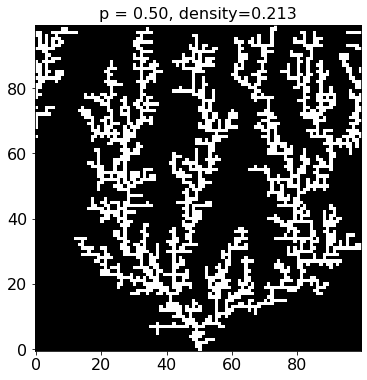

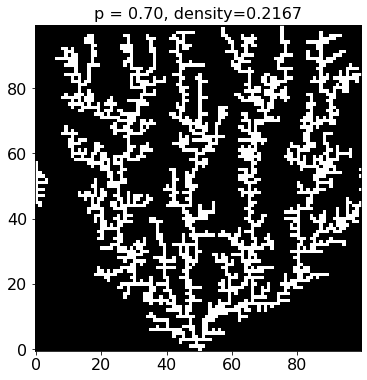

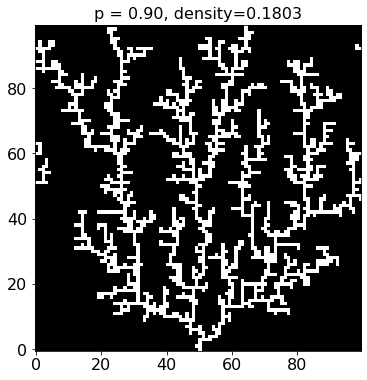

In [4]:
# Plot end result of different structures with different probabilities
ps = np.arange(0.1, 1.1, 0.2)
for p in ps:
    print(f"\rRunning sticking probability: {p:.2f}", end="")

    sim = MonteCarloDLA(N=100, sticking_probability=p)
    sim.run()
    sim.create_plot()

plt.show()

Running sticking probability: 1.00

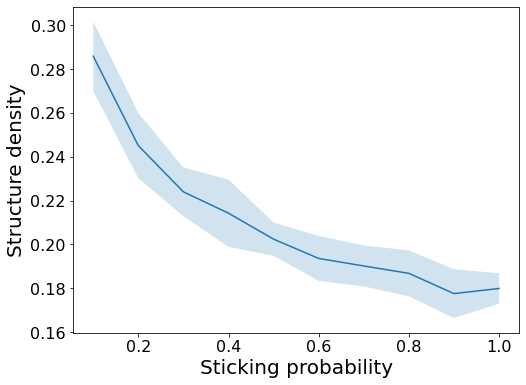

In [5]:
# Plot the density as a function of the sticking probability
N = 100
n_instances = 20

density_means = []
density_stds = []

ps = np.arange(0.1, 1.1, 0.1)
for p in ps:
    print(f"\rRunning sticking probability: {p:.2f}", end="")

    sim_manager = SimulationManager(MonteCarloDLA, n_instances, N=N, sticking_probability=p)
    mean, std = sim_manager.calc_attribute(lambda sim: sim.calc_density())
    density_means.append(mean)
    density_stds.append(std)

density_means = np.array(density_means)
density_stds = np.array(density_stds)

plt.plot(ps, density_means)
plt.fill_between(ps, density_means - density_stds, density_means + density_stds, alpha=0.2)
plt.xlabel("Sticking probability")
plt.ylabel("Structure density")
plt.show()